# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# %load_ext pycodestyle_magic

In [4]:
# %%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean',
                 max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        if self.init == 'k-means':
            self.centroids[0] = X[np.random.randint(0, X.shape[0])]
            for n in range(1, self.k):
                # self.centroids.fillna(0, inplace=True)
                self.centroids = np.nan_to_num(self.centroids)
                pd = pairwise_distances(X, self.centroids[: n], self.metric)
                dists = np.min(pd, axis=1) ** 2
                probs = dists / np.sum(dists)
                self.centroids[n] = X[np.random.choice(range(X.shape[0]),
                                                       p=probs)]
        elif self.init == 'random':
            self.centroids = X[np.random.choice(X.shape[0], size=self.k)]

        for i in range(self.max_iter):
            nxt = self.centroids
            ppdd = pairwise_distances(X, self.centroids, metric=self.metric)
            self.labels = ppdd.argmin(axis=1)
            nxt = np.array([X[self.labels == j].mean(axis=0) for j
                            in range(self.k)])
            if np.all(nxt == self.centroids):
                break
            self.centroids = nxt
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        Возвращает метку ближайшего кластера для каждого объекта
        """

        dists = pairwise_distances(X, self.centroids, metric=self.metric)
        return dists.argmin(axis=1)


class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', batch_size=100):

        super().__init__(k, metric, max_iter, random_state, init)
        self.batch_size = batch_size

    def fit(self, X, y=None):
        np.random.seed(self.random_state)
        self.labels = np.empty(X.shape[0])
        self.centroids = np.empty((self.k, X.shape[1]))

        if self.init == 'k-means':
            self.centroids[0] = X[np.random.randint(0, X.shape[0])]
            for i in range(1, self.k):
                self.centroids = np.nan_to_num(self.centroids)
                pd = pairwise_distances(X, self.centroids[:i], self.metric)
                dists = np.min(pd, axis=1) ** 2
                probs = dists / np.sum(dists)
                self.centroids[i] = X[np.random.choice(
                    range(X.shape[0]), p=probs)]
        elif self.init == 'random':
            self.centroids = X[np.random.choice(X.shape[0], size=self.k)]
        counts = np.zeros(self.k)
        for i in range(self.max_iter):
            if X.shape[0] >= self.batch_size:
                X_batch = X[np.random.choice(X.shape[0], size=self.batch_size)]
            else:
                X_batch = X
            d = pairwise_distances(X_batch, self.centroids, metric=self.metric)
            self.labels = d.argmin(axis=1)
            nxt = self.centroids
            for j in range(X_batch.shape[0]):
                cluster = self.labels[j]
                counts[cluster] += 1
                nxt[cluster] = (1 - (1 / counts[cluster])) * \
                    nxt[cluster] + X_batch[j] / counts[cluster]
            if np.all(nxt == self.centroids):
                break
            self.centroids = next_centroids

        dists = pairwise_distances(X, self.centroids, metric=self.metric)
        self.labels = dists.argmin(axis=1)
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [5]:
from sklearn.datasets import make_blobs

In [70]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

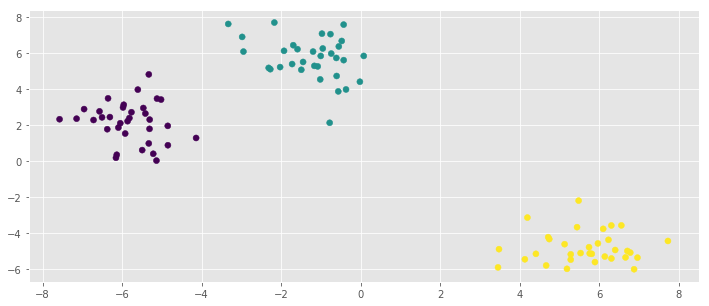

In [71]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [72]:
def performance(realization):
    my_kmeans = realization
    my_kmeans.fit(X)
    pr = my_kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=pr)
    plt.scatter(my_kmeans.centroids[:, 0], my_kmeans.centroids[:, 1])

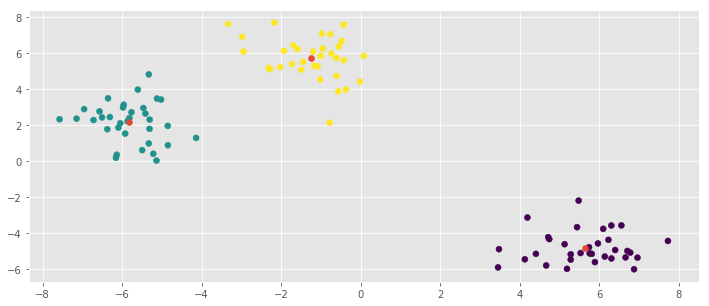

In [73]:
## Работоспособность MyKmeans
performance(MyKmeans(k=3))

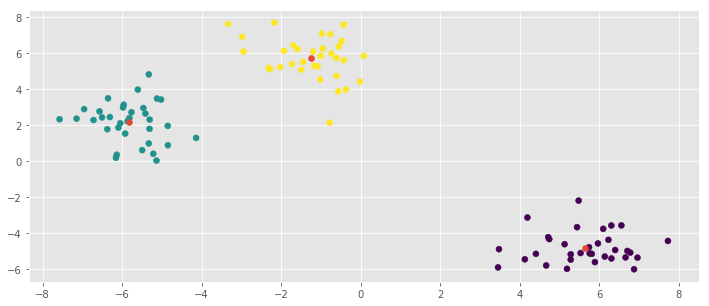

In [74]:
## Работоспособность MyKmeans++
performance(MyKmeans(k=3, init='k-means'))

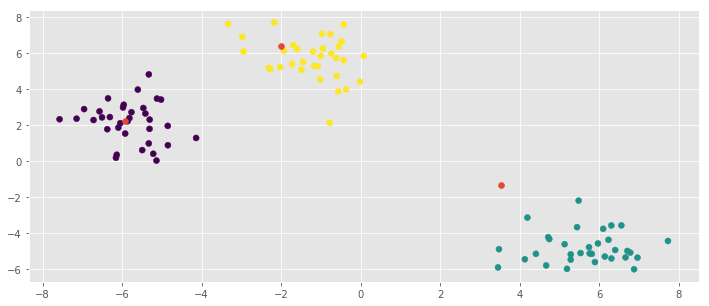

In [75]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
performance(MiniBatchKMeans(k=3))

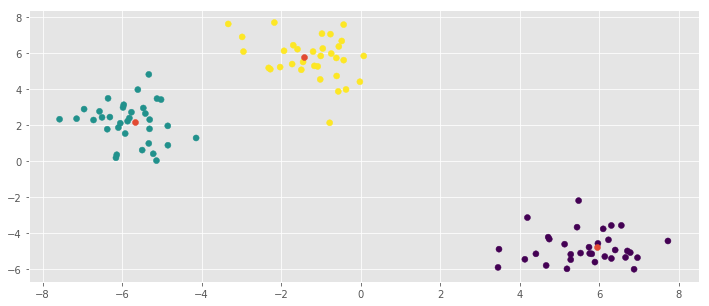

In [76]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
performance(MiniBatchKMeans(k=3, init='k-means'))

In [6]:
from sklearn.cluster import KMeans
from time import time

In [107]:
def execution_time(realization, time):
    start = time()
    kmeans = realization
    kmeans.fit(X)
    prediction = kmeans.predict(X)
    end = time()
    time = end - start
    print("%.1fms" % (time * 1000))

In [108]:
## Время выполнения алгоритма Kmeans из sklearn
execution_time(KMeans(n_clusters=3, init='random', max_iter=1000,
                          precompute_distances=False, n_init=1, tol=0), time)

300.7ms


In [113]:
## Время выполнения алгоритма MyKmeans
execution_time(MyKmeans(k=3), time)

2.0ms


In [114]:
## Время выполнения алгоритма MyKmeans++
execution_time(MyKmeans(k=3, init='k-means'), time)

4.0ms


In [115]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
execution_time(MiniBatchKMeans(k=3), time)

5.0ms


In [116]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
execution_time(MiniBatchKMeans(k=3, init='k-means'), time)

8.0ms


In [1]:
def measuring_time(realization, time):
    times = []
    for i in range(1, 41):
        iter_time = []
        for j in range(20):
            X, y = make_blobs(n_samples=2000 * i, n_features=2, centers=3, cluster_std=1, 
                              center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
            start = time()
            realization.fit(X)
            iter_time.append(time() - start)
        times.append(np.mean(iter_time))
    plt.plot(2000 * np.arange(1, 41), times)
    plt.show()

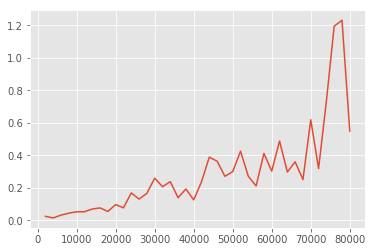

In [7]:
measuring_time(MyKmeans(k=3), time)

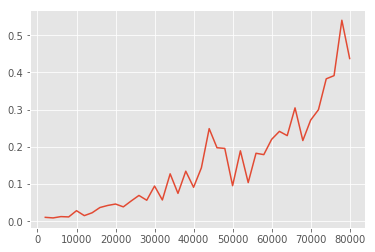

In [8]:
measuring_time(MyKmeans(k=3, init='k-means'), time)

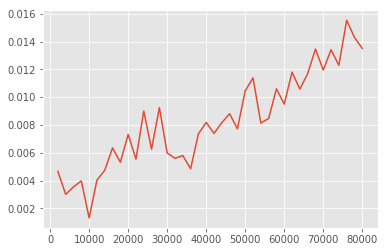

In [9]:
measuring_time(MiniBatchKMeans(k=3), time)

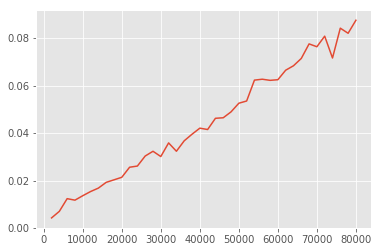

In [10]:
measuring_time(MiniBatchKMeans(k=3, init='k-means'), time)

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [117]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [118]:
df_sns = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis='columns')
df_sns = (df_sns - df_sns.mean()) / df_sns.std()

def select_and_print_clusters(realization):
    kmeans = realization
    kmeans.fit(df_sns.values)
    keywords = df_sns.columns
    for cluster, centroid in enumerate(kmeans.centroids):
        print("№", 1 + cluster, ", ", len(kmeans.labels[cluster == kmeans.labels]))
        print(" students, ", keywords[np.argsort(centroid)[-7: ]].values, "\n")

In [119]:
## MyKMeans
select_and_print_clusters(MyKmeans(k=9))

№ 1 ,  946
 students,  ['clothes' 'die' 'drunk' 'sex' 'hair' 'drugs' 'kissed'] 

№ 2 ,  745
 students,  ['football' 'death' 'god' 'rock' 'music' 'band' 'marching'] 

№ 3 ,  840
 students,  ['hot' 'hair' 'clothes' 'mall' 'shopping' 'abercrombie' 'hollister'] 

№ 4 ,  4929
 students,  ['hot' 'baseball' 'basketball' 'mall' 'cute' 'football' 'shopping'] 

№ 5 ,  497
 students,  ['soccer' 'mall' 'cute' 'music' 'clothes' 'shopping' 'swimming'] 

№ 6 ,  515
 students,  ['baseball' 'football' 'shopping' 'sports' 'volleyball' 'basketball'
 'softball'] 

№ 7 ,  978
 students,  ['hair' 'church' 'music' 'shopping' 'cute' 'dress' 'dance'] 

№ 8 ,  20175
 students,  ['die' 'drunk' 'death' 'bible' 'jesus' 'tennis' 'blonde'] 

№ 9 ,  375
 students,  ['music' 'die' 'death' 'church' 'god' 'jesus' 'bible'] 



школьники разделились на следующие кластеры:
1) деграданты какие-то явно =]
2) рокеры
3) стараются хорошо выглядеть
4) *кластер резко больше остальных - трудно интерпретируется*
5) типичные увлечения? серая масса
6) занимаются командными видами спорта
7) ухаживают за своей внешностью, важно поддерживать имидж, создать впечатление - "показушники"
8) *кластер резко больше остальных - трудно интерпретируется*
9) христиане

In [120]:
## MyKMeans++
select_and_print_clusters(MyKmeans(k=9, init="k-means"))

№ 1 ,  1716
 students,  ['clothes' 'hair' 'mall' 'cute' 'shopping' 'dance' 'dress'] 

№ 2 ,  19774
 students,  ['drunk' 'death' 'sexy' 'bible' 'cheerleading' 'tennis' 'blonde'] 

№ 3 ,  1013
 students,  ['clothes' 'sex' 'die' 'drunk' 'hair' 'drugs' 'kissed'] 

№ 4 ,  494
 students,  ['volleyball' 'mall' 'cute' 'clothes' 'music' 'shopping' 'swimming'] 

№ 5 ,  2172
 students,  ['rock' 'sports' 'volleyball' 'football' 'baseball' 'softball'
 'basketball'] 

№ 6 ,  3260
 students,  ['dance' 'jesus' 'cute' 'god' 'marching' 'band' 'church'] 

№ 7 ,  36
 students,  ['music' 'sports' 'drugs' 'blonde' 'kissed' 'hair' 'sex'] 

№ 8 ,  855
 students,  ['cheerleading' 'hair' 'clothes' 'mall' 'shopping' 'abercrombie'
 'hollister'] 

№ 9 ,  680
 students,  ['tennis' 'rock' 'basketball' 'football' 'shopping' 'sports' 'soccer'] 



1) шопоголики, девочки
2) *кластер резко больше остальных - трудно интерпретируется*
3) те же самые деграданты
4) спорт, девочки
5) спорт
6) верующие
7) тусовщики
8) группа поддержки
9) спорт, мальчики

In [121]:
## MyKMeans с MiniBatchMyKMeans
select_and_print_clusters(MiniBatchKMeans(k=9))

№ 1 ,  1767
 students,  ['god' 'football' 'cute' 'basketball' 'shopping' 'clothes' 'church'] 

№ 2 ,  148
 students,  ['shopping' 'church' 'die' 'sexy' 'dance' 'jesus' 'music'] 

№ 3 ,  226
 students,  ['abercrombie' 'drugs' 'tennis' 'marching' 'bible' 'blonde' 'baseball'] 

№ 4 ,  17482
 students,  ['marching' 'cheerleading' 'swimming' 'blonde' 'bible' 'drunk' 'cute'] 

№ 5 ,  490
 students,  ['softball' 'hollister' 'basketball' 'abercrombie' 'cheerleading' 'soccer'
 'football'] 

№ 6 ,  919
 students,  ['drunk' 'hollister' 'mall' 'abercrombie' 'drugs' 'sexy' 'football'] 

№ 7 ,  942
 students,  ['hair' 'church' 'dress' 'shopping' 'abercrombie' 'hollister' 'mall'] 

№ 8 ,  4738
 students,  ['shopping' 'volleyball' 'mall' 'jesus' 'god' 'music' 'soccer'] 

№ 9 ,  3288
 students,  ['die' 'bible' 'basketball' 'band' 'softball' 'sexy' 'sports'] 



здесь большинство сложно интерпровать:
2) какие-то танцующие верующие?
5) группа поддержки

In [122]:
## MyKMeans++ с MiniBatchMyKMeans
select_and_print_clusters(MiniBatchKMeans(k=9, init="k-means"))

№ 1 ,  1721
 students,  ['shopping' 'mall' 'hot' 'football' 'bible' 'cute' 'dance'] 

№ 2 ,  26825
 students,  ['sports' 'god' 'volleyball' 'death' 'jesus' 'softball' 'tennis'] 

№ 3 ,  68
 students,  ['swimming' 'baseball' 'kissed' 'clothes' 'football' 'drugs' 'sex'] 

№ 4 ,  240
 students,  ['music' 'soccer' 'god' 'blonde' 'marching' 'band' 'jesus'] 

№ 5 ,  194
 students,  ['blonde' 'music' 'god' 'rock' 'dance' 'church' 'band'] 

№ 6 ,  97
 students,  ['music' 'hair' 'kissed' 'cute' 'band' 'football' 'sports'] 

№ 7 ,  830
 students,  ['music' 'jesus' 'clothes' 'cheerleading' 'shopping' 'band' 'marching'] 

№ 8 ,  8
 students,  ['tennis' 'marching' 'blonde' 'die' 'jesus' 'god' 'bible'] 

№ 9 ,  17
 students,  ['drugs' 'die' 'church' 'abercrombie' 'bible' 'god' 'jesus'] 



а здесь возникли очень маленькие группы
1) *кластер резко больше остальных - трудно интерпретируется*
2) кластер огромный, тут спорт и религия
3) спортсмены-тусовщики
4) *сложно понять*
5) некая церковная рок-группа?
6) *сложно понять*
7) группа поддержки
8) какая-то узкая группа среди верующих
9) не очень позитивные христиане...

In [ ]:
## Вывод
с MiniBatchMyKMeans хуже - кластеры получались или очень маленькие, или неинтерпретируемые